In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [3]:
data = pd.read_csv("rainAus.csv")
data.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


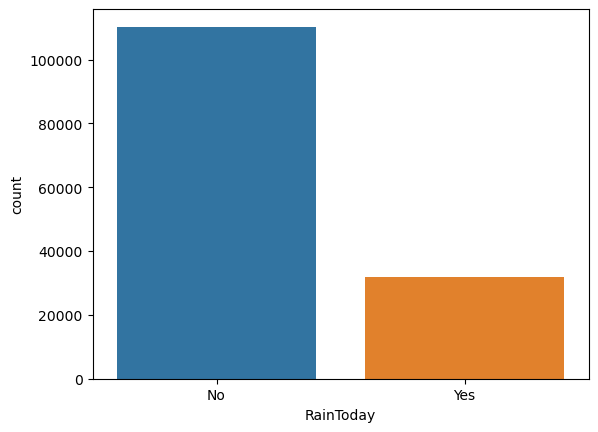

In [6]:
sns.countplot(x='RainToday', data = data)
plt.show()

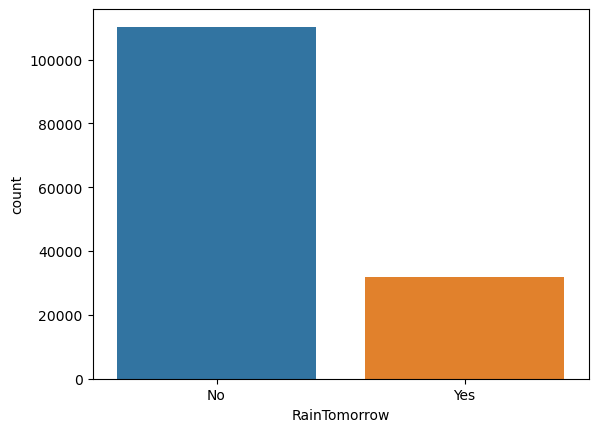

In [7]:
sns.countplot(x='RainTomorrow', data = data)
plt.show()

In [3]:
data.fillna(0,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.069546,23.020041,2.307990,3.107787,3.957069,37.210525,13.872831,18.269799,67.624062,49.942204,912.253980,910.366122,2.738677,2.669559,16.784235,21.145405
std,6.482693,7.407808,8.389771,4.163070,4.680785,16.649265,8.993610,9.119006,20.987869,22.334356,310.151281,309.084382,3.132539,3.048519,6.712427,7.635396
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,0.000000,0.000000,30.000000,7.000000,11.000000,56.000000,35.000000,1010.900000,1008.400000,0.000000,0.000000,12.100000,16.200000
50%,11.900000,22.500000,0.000000,1.600000,0.100000,37.000000,13.000000,17.000000,69.000000,51.000000,1016.600000,1014.200000,1.000000,1.000000,16.600000,20.900000
75%,16.800000,28.200000,0.600000,5.200000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [6]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
data.drop(["Date","Location"], axis = 1, inplace=True)

In [9]:
data.drop(["Evaporation","Sunshine"], axis = 1, inplace=True)

In [10]:
data.WindGustDir.value_counts()

WindGustDir
0      10326
W       9915
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: count, dtype: int64

In [11]:
data.WindDir9am.value_counts()

WindDir9am
N      11758
0      10566
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

In [12]:
data.replace({"WindGustDir":{'N': 0, '0': 1, 'SE': 2, 'E': 3, 'SSE': 4, 'NW': 5, 'S': 6, 'W': 7,
 'SW': 8, 'NNE': 9, 'NNW': 10, 'ENE': 11, 'NE': 12, 'ESE': 13,
 'SSW': 14, 'WNW': 15, 'WSW': 16}
}, inplace=True)

In [13]:
data.replace({"WindDir9am":{'N': 0, '0': 1, 'SE': 2, 'E': 3, 'SSE': 4, 'NW': 5, 'S': 6, 'W': 7,
 'SW': 8, 'NNE': 9, 'NNW': 10, 'ENE': 11, 'NE': 12, 'ESE': 13,
 'SSW': 14, 'WNW': 15, 'WSW': 16}
}, inplace=True)

In [14]:
data.replace({"WindDir3pm":{'N': 0, '0': 1, 'SE': 2, 'E': 3, 'SSE': 4, 'NW': 5, 'S': 6, 'W': 7,
 'SW': 8, 'NNE': 9, 'NNW': 10, 'ENE': 11, 'NE': 12, 'ESE': 13,
 'SSW': 14, 'WNW': 15, 'WSW': 16}
}, inplace=True)

In [15]:
data.RainToday.value_counts()

RainToday
No     110319
Yes     31880
0        3261
Name: count, dtype: int64

In [16]:
data.replace({"RainToday":{"No":0,"Yes":1,"0":2}}, inplace=True)

In [17]:
data.replace({"RainTomorrow":{"No":0,"Yes":1,"0":2}}, inplace=True)


In [18]:
X=data.drop(["RainTomorrow"], axis=1)
y= data['RainTomorrow']

In [19]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
classifier = DecisionTreeClassifier()

In [22]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred =classifier.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
r2_score_test = r2_score(y_test,y_pred)
print(f'The r2 score will be:{r2_score_test}')

The r2 score will be:-0.27624523992191086


In [25]:
classifier_random = RandomForestClassifier()

In [26]:
classifier_random.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred_random =classifier.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
r2_score_random = r2_score(y_test,y_pred)
print(f'The r2 score will be:{r2_score_random}')

The r2 score will be:-0.27624523992191086


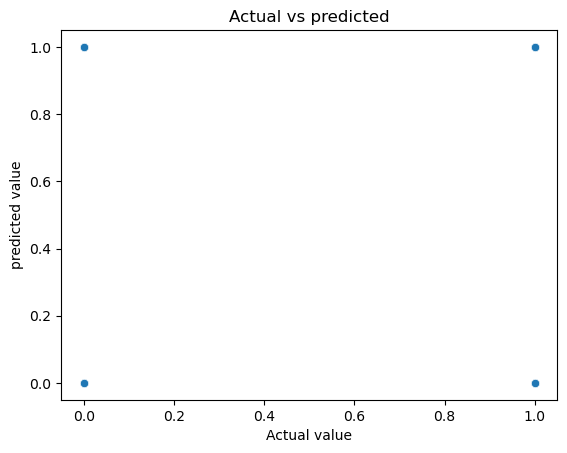

In [29]:
import seaborn as sns
sns.scatterplot(x=y_test, y = y_pred)
plt.title('Actual vs predicted')
plt.xlabel('Actual value')
plt.ylabel('predicted value')
plt.show()

In [30]:
data.head(1)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,7,44.0,7,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0


In [33]:
new_value=[[13.4,22.9,0.6,7,44.0,7,15,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0]]

In [34]:
new_value=scaler.transform(new_value)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
new_predcition = classifier_random.predict(new_value)
print(f'The new prediction is:{new_predcition[0]}')

The new prediction is:0


In [37]:
probability = classifier_random.predict_proba(new_value)
print(f"Probability of class 0: {probability[0][0]:.2f}")
print(f"Probability of class 1: {probability[0][1]:.2f}")

Probability of class 0: 0.82
Probability of class 1: 0.18


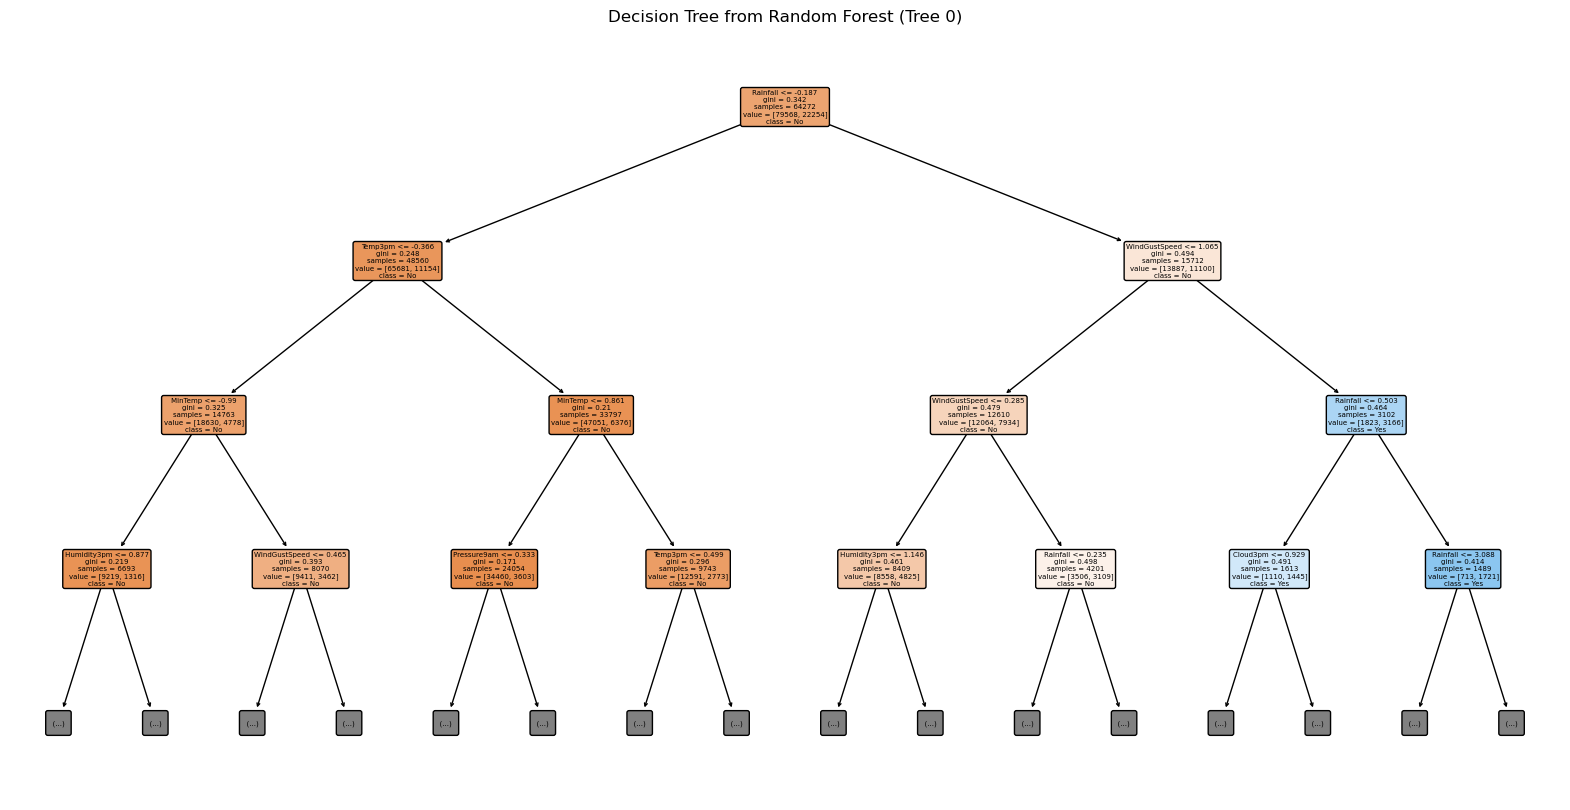

In [39]:
estimator = classifier_random.estimators_[0]
from sklearn.tree import plot_tree
# Plot the selected decision tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          filled=True, 
          feature_names=data.columns.tolist(), 
          class_names=['No', 'Yes'], 
          rounded=True, 
          max_depth=3)  # Optional: limit depth for clarity
plt.title("Decision Tree from Random Forest (Tree 0)")
plt.show()
